In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv(fr"AbandonoEmpleados.csv", sep = ';', index_col = 'id', na_values = '#N/D')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_civil 

In [8]:
df.isna().sum().sort_values(ascending = False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

Se eliminan las variables anos_en_puesto y conciliación, debido a su alto número de valores nulos. 

Se hará EDA en las variables sexo, educacion, satisfaccion_trabajo e implicacion, a pesar de tener datos nulos, no son muchos

In [9]:
df.drop(columns = ['anos_en_puesto','conciliacion'], inplace = True) #El inplace se usa para que se aplique el cambio directamente al DF

In [11]:
# EDA variables categóricas

def graficos_eda_categoricas(cat):

    #Se calcula el número de filas necesarias:

    from math import _SupportsCeil
    filas = ceil(cat.shape[1]/2)

    #se define el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas*16))

    # Se crea el bucle que va anadiendo cada uno de los graficos
    for cada, variable in enumerate(cat):
            cat[variable].value_counts()

In [12]:
# EDA variables categóricas

def graficos_eda_categoricas(cat):
    
    #Calculamos el numnero de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1]/2)
    
    #Definimos el grafico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 16))
    
    #Aplanamos para iterar el grafico
    ax = ax.flat
    
    #Creamos el bucle que va anadiendo cada uno de los graficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = 'bold')
        ax[cada].tick_params(labelsize = 12)

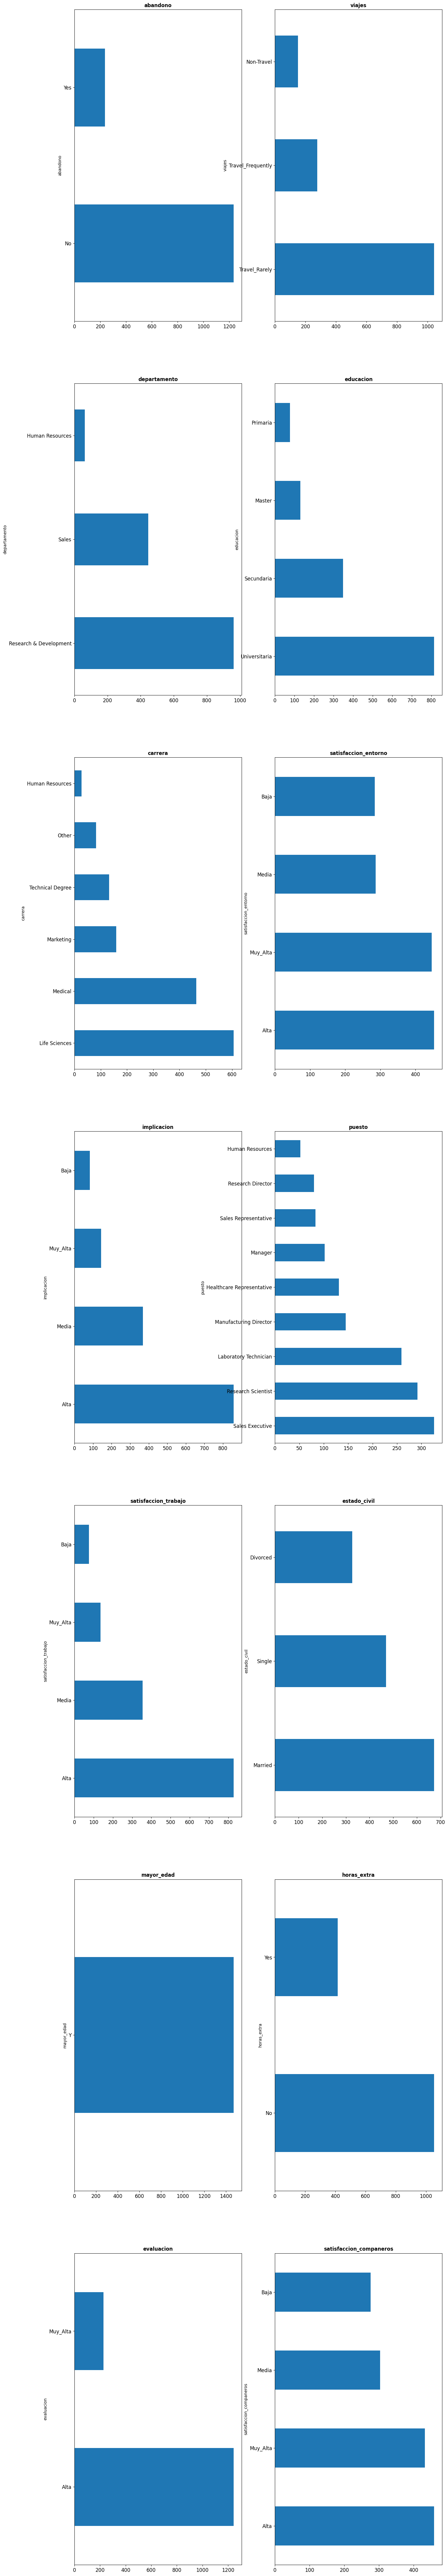

In [14]:
graficos_eda_categoricas(df.select_dtypes('O'))